# Dimensionality Reduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Projection methods

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

[Text(0.5, 0, '$x_1$'),
 Text(0.5, 0.5, '$x_2$'),
 Text(0.5, 0, '$x_3$'),
 (-1.8, 1.8),
 (-1.3, 1.3),
 (-1.0, 1.0)]

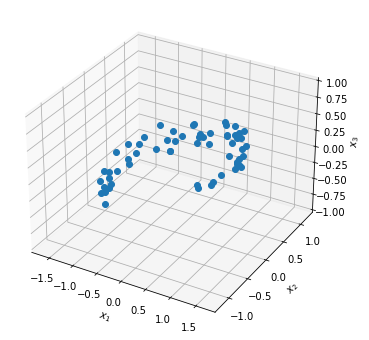

In [3]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], X[:, 2], 'o')

lims = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

ax.set(xlabel="$x_1$",
       ylabel="$x_2$",
       zlabel="$x_3$",
       xlim=lims[0:2],
       ylim=lims[2:4],
       zlim=lims[4:6])

# PCA using Scikit-Learn

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [5]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

Recover the 3D points projected on the plane (PCA 2D subspace).

In [6]:
X3D_inv = pca.inverse_transform(X2D)

We can compute the reconstruction error:

In [7]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The `PCA` object gives access to the principal components that it computed:

In [8]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Now let's look at the explained variance ratio:

In [9]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

The first dimension explains 84.2% of the variance, while the second explains 14.6%.

By projecting down to 2D, we lost about 1.1% of the variance:

In [10]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

Express the plane as a function of x and y.

In [11]:
def make_mesh(lims, h):
    x = np.linspace(lims[0], lims[1], h)
    y = np.linspace(lims[2], lims[3], h)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

In [12]:
lims = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1, x2 = make_mesh(lims, h=10)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

Plot the 3D dataset, the plane and the projections on that plane.

In [13]:
from mpl_toolkits.mplot3d import Axes3D

[Text(0.5, 0, '$x_1$'),
 Text(0.5, 0.5, '$x_2$'),
 Text(0.5, 0, '$x_3$'),
 (-1.8, 1.8),
 (-1.3, 1.3),
 (-1.0, 1.0)]

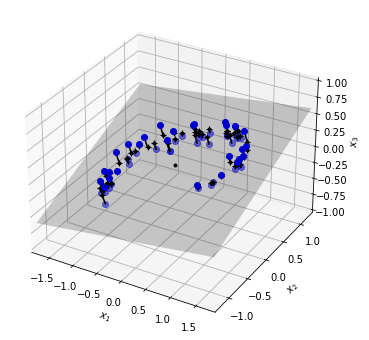

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)

ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "k-")

ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set(xlabel="$x_1$",
       ylabel="$x_2$",
       zlabel="$x_3$",
       xlim=lims[0:2],
       ylim=lims[2:4],
       zlim=lims[4:6])

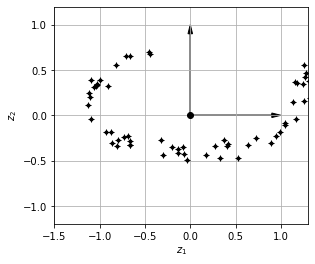

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0,
         0,
         0,
         1,
         head_width=0.05,
         length_includes_head=True,
         head_length=0.1,
         fc='k',
         ec='k')
ax.arrow(0,
         0,
         1,
         0,
         head_width=0.05,
         length_includes_head=True,
         head_length=0.1,
         fc='k',
         ec='k')
ax.set(xlabel="$z_1$", ylabel="$z_2$")
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

# Manifold learning

In [16]:
from sklearn.datasets import make_swiss_roll

In [17]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

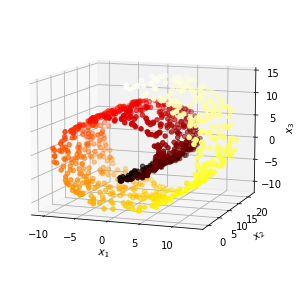

In [18]:
lims = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set(xlabel="$x_1$",
       ylabel="$x_2$",
       zlabel="$x_3$",
       xlim=lims[0:2],
       ylim=lims[2:4],
       zlim=lims[4:6])

plt.show()

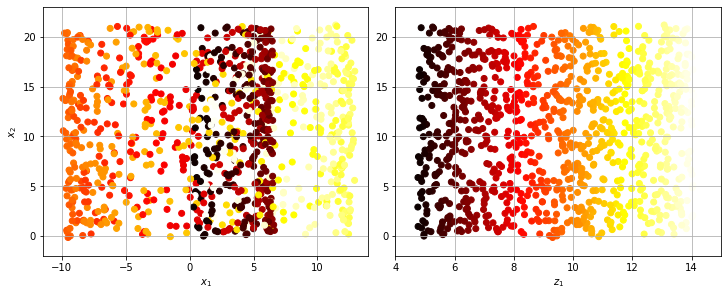

In [19]:
_, axes = plt.subplots(1, 2, figsize=(10, 4),  constrained_layout=True)

axes[0].scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
axes[0].axis(lims[:4])
axes[0].set(xlabel="$x_1$",ylabel="$x_2$")
axes[0].grid(1)

axes[1].scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
axes[1].axis([4, 15] + lims[2:4])
axes[1].set(xlabel="$z_1$")
axes[1].grid(1)

plt.show()

In [20]:
lims = [-11.5, 14, -2, 23, -12, 15]

x2, x3 = make_mesh(lims=lims[2:6], h=10)

In [21]:
from matplotlib import gridspec

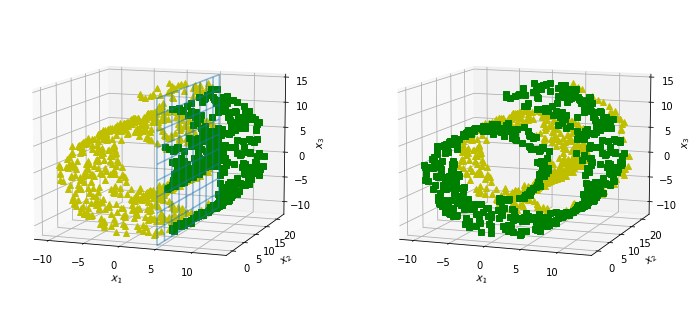

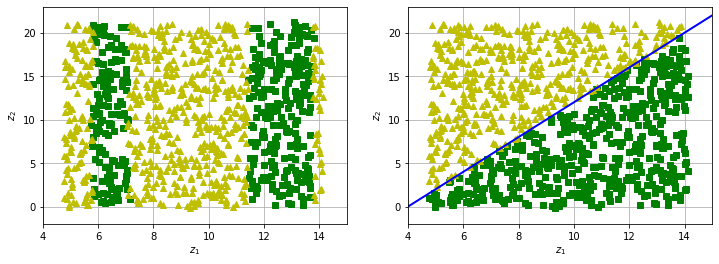

In [22]:
fig = plt.figure(figsize=(12, 8))

pos_classes = [X[:, 0] > 5, 2 * (t[:] - 4) > X[:, 1]]

for ind, positive_class in enumerate(pos_classes):

    ax = plt.subplot(121 + ind, projection='3d')
    X_pos = X[positive_class]
    X_neg = X[~positive_class]
    ax.view_init(10, -70)
    ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
    ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")

    if ind == 0:
        ax.plot_wireframe(5, x2, x3, alpha=0.5)

    ax.set(xlabel="$x_1$",
           ylabel="$x_2$",
           zlabel="$x_3$",
           xlim=lims[0:2],
           ylim=lims[2:4],
           zlim=lims[4:6])

fig = plt.figure(figsize=(12, 4))

for ind, positive_class in enumerate(pos_classes):
    ax = plt.subplot(121 + ind)
    ax.plot(t[positive_class], X[positive_class, 1], "gs")
    ax.plot(t[~positive_class], X[~positive_class, 1], "y^")
    ax.set(xlabel="$z_1$", ylabel="$z_2$")
    ax.axis([4, 15] + lims[2:4])
    ax.grid(1)
    if ind == 1:
        ax.plot([4, 15], [0, 22], "b-", lw=2)

plt.show()


# PCA

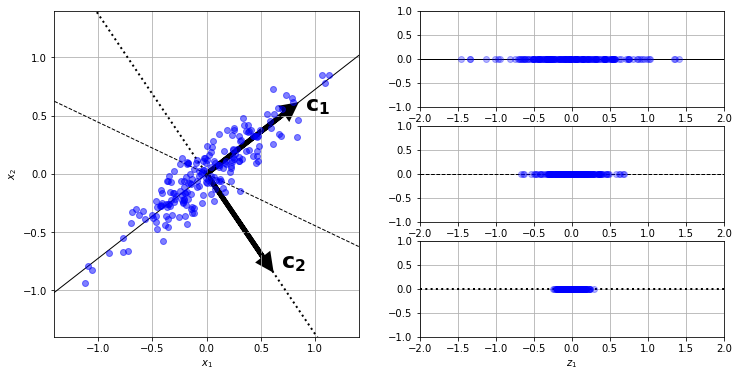

In [23]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0], [0, 1]]))  # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle),
                                            np.cos(angle)]])  # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(12, 6))
ax = plt.subplot2grid((3, 2), (0, 0), rowspan=3)

ax.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-", lw=1)
ax.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--", lw=1)
ax.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:", lw=2)
ax.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
ax.axis([-1.4, 1.4, -1.4, 1.4])

arrow_prop = {
    'head_width': 0.1,
    'lw': 5,
    'length_includes_head': True,
    'head_length': 0.1,
    'fc': 'k',
    'ec': 'k'
}

ax.arrow(0, 0, u1[0], u1[1], **arrow_prop)
ax.arrow(0, 0, u3[0], u3[1], **arrow_prop)
ax.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
ax.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
ax.set(xlabel="$x_1$", ylabel="$x_2$")
ax.grid(1)

ax = plt.subplot2grid((3, 2), (0, 1))
ax.plot([-2, 2], [0, 0], "k-", lw=1)
ax.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
ax.axis([-2, 2, -1, 1])
ax.grid(1)

ax = plt.subplot2grid((3, 2), (1, 1))
ax.plot([-2, 2], [0, 0], "k--", lw=1)
ax.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
ax.axis([-2, 2, -1, 1])
ax.grid(1)

ax = plt.subplot2grid((3, 2), (2, 1))
ax.plot([-2, 2], [0, 0], "k:", lw=2)
ax.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
ax.axis([-2, 2, -1, 1])
ax.set(xlabel="$z_1$")
ax.grid(1)

plt.show()

## MNIST compression

In [24]:
mnist_784 = np.load('../../datasets/handson/mnist_784.npz', allow_pickle=True)
X, y = mnist_784['X'], mnist_784['y']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
X_train.shape

(52500, 784)

In [27]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

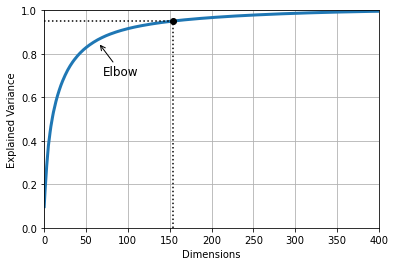

In [28]:
_, ax = plt.subplots(figsize=(6, 4))

ax.plot(cumsum, lw=3)
ax.hlines(y=0.95, xmin=0, xmax=d, color='k', ls='dotted')
ax.vlines(x=d, ymin=0, ymax=0.95, color='k', ls='dotted')
ax.plot(d, 0.95, "ko")
ax.annotate("Elbow",
            xy=(65, 0.85),
            xytext=(70, 0.7),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')
ax.set(xlabel="Dimensions", ylabel="Explained Variance")
ax.axis([0, 400, 0, 1])
ax.grid(1)

In [29]:
X_reduced = pca.fit_transform(X_train)

In [30]:
pca.n_components_

784

In [31]:
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
import matplotlib as mpl

In [33]:
def plot_digit(ax, data):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    ax.axis("off")

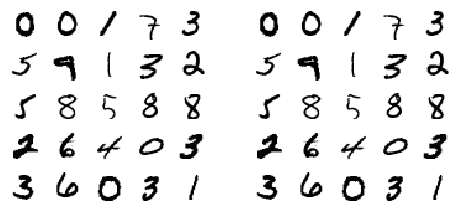

In [34]:
fig = plt.figure(figsize=(8, 8))
outer_grid = fig.add_gridspec(2, 2, wspace=0.2, hspace=0.2)

out_grids = [(0, 0), (0, 1)]
titles = ["Original", "Compressed"]

for X_subset, (a, b), title in zip([X_train, X_recovered], out_grids, titles):
    inner_grid = outer_grid[a, b].subgridspec(5, 5)
    axes = inner_grid.subplots()

    X_c = X_subset[::2100]

    for ind, ax in enumerate(axes.flatten()):
        plot_digit(ax, X_c[ind, :])

plt.show()

In [35]:
X_reduced_pca = X_reduced

## Incremental PCA

In [36]:
from sklearn.decomposition import IncrementalPCA

n_batches = 50
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [37]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

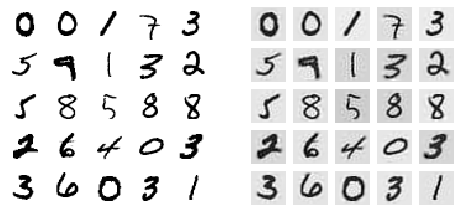

In [38]:
fig = plt.figure(figsize=(8, 8))
outer_grid = fig.add_gridspec(2, 2, wspace=0.2, hspace=0.2)

out_grids = [(0, 0), (0, 1)]
titles = ["Original", "Compressed"]

for X_subset, (a, b), title in zip([X_train, X_recovered_inc_pca], out_grids,
                                   titles):
    inner_grid = outer_grid[a, b].subgridspec(5, 5)
    axes = inner_grid.subplots()

    X_c = X_subset[::2100]

    for ind, ax in enumerate(axes.flatten()):
        plot_digit(ax, X_c[ind, :])

plt.show()

In [39]:
X_reduced_inc_pca = X_reduced

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal: 

In [40]:
np.allclose(pca.mean_, inc_pca.mean_)

True

## Time complexity

Let's time regular PCA against Incremental PCA and Randomized PCA, for various number of principal components:

In [41]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=200)
    rnd_pca = PCA(n_components=n_components,
                  random_state=42,
                  svd_solver="randomized")
    names = ["PCA", "Inc PCA", "Rnd PCA"]
    pcas = [regular_pca, inc_pca, rnd_pca]

    for name, pca in zip(names, pcas):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print(f"{name}: {t2 - t1:.1f} seconds")

n_components = 2
PCA: 21.6 seconds
Inc PCA: 155.1 seconds
Rnd PCA: 1.2 seconds
n_components = 10
PCA: 6.2 seconds
Inc PCA: 93.0 seconds
Rnd PCA: 2.3 seconds
n_components = 154
PCA: 9.2 seconds
Inc PCA: 451.0 seconds
Rnd PCA: 5.0 seconds


Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

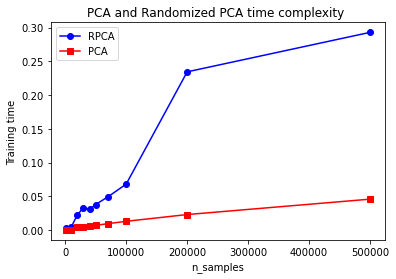

In [42]:
times_rpca = []
times_pca = []
sizes = [
    1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000
]

_, ax = plt.subplots(figsize=(6, 4))

for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

ax.plot(sizes, times_rpca, "b-o", label="RPCA")
ax.plot(sizes, times_pca, "r-s", label="PCA")
ax.set(xlabel="n_samples",
       ylabel="Training time",
       title="PCA and Randomized PCA time complexity ")
ax.legend()

And now let's compare their performance on datasets of 2,000 instances with various numbers of features:

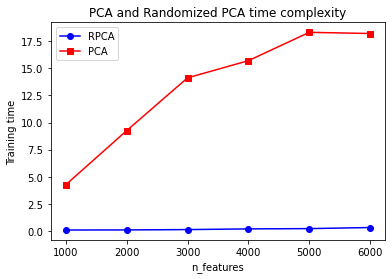

In [43]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]

for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

_, ax = plt.subplots(figsize=(6, 4))

ax.plot(sizes, times_rpca, "b-o", label="RPCA")
ax.plot(sizes, times_pca, "r-s", label="PCA")
ax.set(xlabel="n_features",
       ylabel="Training time",
       title="PCA and Randomized PCA time complexity")
ax.legend()
plt.show()

## Kernel PCA

In [44]:
from sklearn.decomposition import KernelPCA

In [45]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [46]:
lin_pca = KernelPCA(n_components=2,
                    kernel="linear",
                    fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2,
                    kernel="rbf",
                    gamma=0.0433,
                    fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2,
                    kernel="sigmoid",
                    gamma=0.001,
                    coef0=1,
                    fit_inverse_transform=True)

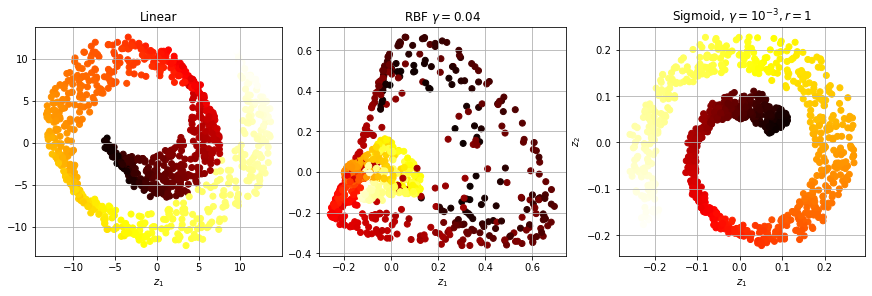

In [47]:
y = t > 6.9

_, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

titles = ["Linear", "RBF $γ=0.04$", "Sigmoid, $γ=10^{-3}, r=1$"]
pcas = [lin_pca, rbf_pca, sig_pca]

for title, pca, ax in zip(titles, pcas, axes.flatten()):
    ax.annotate("Elbow",
                xy=(65, 0.85),
                xytext=(70, 0.7),
                arrowprops=dict(arrowstyle="->"),
                fontsize='large')
    X_reduced = pca.fit_transform(X)
    ax.set(xlabel="$z_1$", title=title)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

    ax.grid(1)

axes[2].set(ylabel="$z_2$")
plt.show()

In [48]:
X_reduced_rbf = rbf_pca.fit_transform(X)

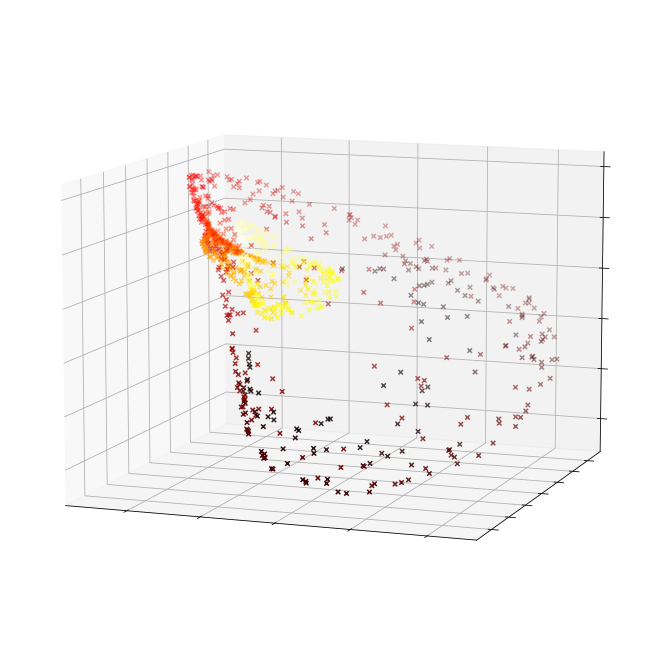

In [49]:
plt.figure(figsize=(12, 12))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0],
           X_inverse[:, 1],
           X_inverse[:, 2],
           c=t,
           cmap=plt.cm.hot,
           marker="x")

ax.set(xlabel="",
       ylabel="",
       zlabel="",
       xticklabels=[],
       yticklabels=[],
       zticklabels=[]);

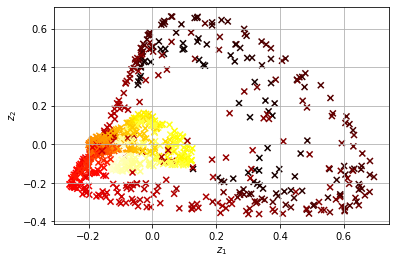

In [50]:
X_reduced = rbf_pca.fit_transform(X)

_, ax = plt.subplots(figsize=(6, 4))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
ax.set(xlabel="$z_1$", ylabel="$z_2$")
ax.grid(1)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [52]:
clf = Pipeline([("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression(solver="lbfgs"))])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [53]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [54]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576611

# Exercise solutions

*Exercise: Load the MNIST dataset (introduced in chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).*

In [56]:
mnist_784 = np.load('../../datasets/handson/mnist_784.npz', allow_pickle=True)
X, y = mnist_784['X'], mnist_784['y']
y = y.ravel()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1 / 7,
                                                    random_state=42)

*Exercise: Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.*

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 22.52s


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9674

*Exercise: Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.*

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

*Exercise: Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?*

In [65]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print(f"Training took {t1 - t0:.2f}s")

Training took 82.42s


Oh no! Training is actually more than twice slower now! How can that be? Well, as we saw in this chapter, dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm. See figure 8-6 (the `manifold_decision_boundary_plot*` plots above). If you try a softmax classifier instead of a random forest classifier, you will find that training time is reduced by a factor of 3 when using PCA. Actually, we will do this in a second, but first let's check the precision of the new random forest classifier.

*Exercise: Next evaluate the classifier on the test set: how does it compare to the previous classifier?*

In [66]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9469

It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance.

Let's see if it helps when using softmax regression:

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_clf = LogisticRegression(multi_class="multinomial",
                             solver="lbfgs",
                             max_iter=1000,
                             random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print(f"Training took {t1 - t0:.2f}s")

Training took 482.88s


/opt/homebrew/Caskroom/mambaforge/base/envs/kaggle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9175

Okay, so softmax regression takes much longer to train on this dataset than the random forest classifier, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:

In [70]:
log_clf2 = LogisticRegression(multi_class="multinomial",
                              solver="lbfgs",
                              max_iter=1000,
                              random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print(f"Training took {t1 - t0:.2f}s")

Training took 192.54s


/opt/homebrew/Caskroom/mambaforge/base/envs/kaggle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nice! Reducing dimensionality led to over 2× speedup. :)  Let's check the model's accuracy:

In [71]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9167

A very slight drop in performance, which might be a reasonable price to pay for a 2× speedup, depending on the application.

So there you have it: PCA can give you a formidable speedup... but not always!

# UMAP

In [72]:
import umap

Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:

In [73]:
mnist_784 = np.load('../../datasets/handson/mnist_784.npz', allow_pickle=True)
X, y = mnist_784['X'], mnist_784['y']
y = y.ravel()
y = y.astype('int')

In [74]:
X.shape

(70000, 784)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1 / 7,
                                                    random_state=42)

In [76]:
X_train.shape

(60000, 784)

In [77]:
reducer = umap.UMAP(n_neighbors=100,
                    min_dist=0.5,
                    local_connectivity=2,
                    random_state=42)
embedding = reducer.fit_transform(X_train)
embedding.shape

(60000, 2)

In [78]:
y_train.shape

(60000,)

Let's focus on digits 2, 3 and 5, which seem to overlap a lot.

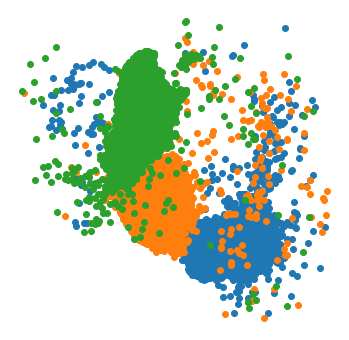

In [79]:
cmap = mpl.cm.get_cmap("jet")

_, ax = plt.subplots(figsize=(6, 6))

for digit in (2, 3, 5):
    ax.scatter(embedding[y_train == digit, 0],
               embedding[y_train == digit, 1])

ax.axis('off')
plt.show()

In [80]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

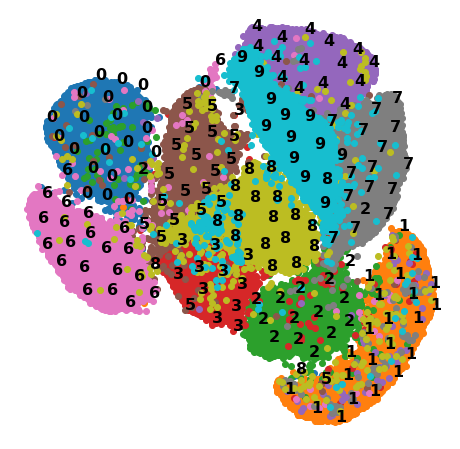

In [81]:
def plot_digits(ax, X, y, min_distance=0.05, images=None):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory

    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)

    for digit in digits:
        ax.scatter(
            X_normalized[y == digit, 0],
            X_normalized[y == digit, 1],
        )
    ax.axis("off")

    for ind, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord,
                                          axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                ax.text(image_coord[0],
                        image_coord[1],
                        str(int(y[ind])),
                        fontdict={
                            "weight": "bold",
                            "size": 16
                        })
            else:
                image = images[ind].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)


_, ax = plt.subplots(figsize=(8, 8))

plot_digits(ax, embedding, y_train)

Well that's okay, but not that beautiful. Let's try with the digit images:

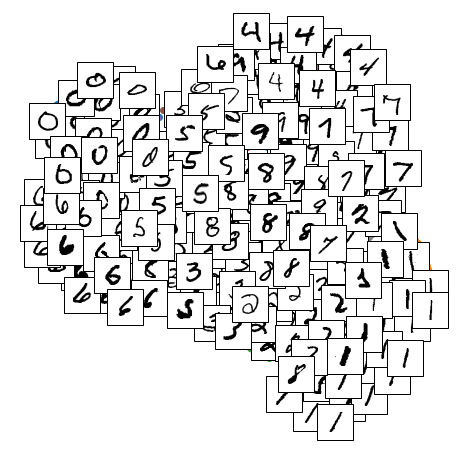

In [82]:
_, ax = plt.subplots(figsize=(8, 8))

plot_digits(ax, embedding, y_train, images=X_train)

Let's start with PCA. We will also time how long it takes:

In [83]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print(f"UMAP took {t1 - t0:.1f}s.")

UMAP took 2.5s.


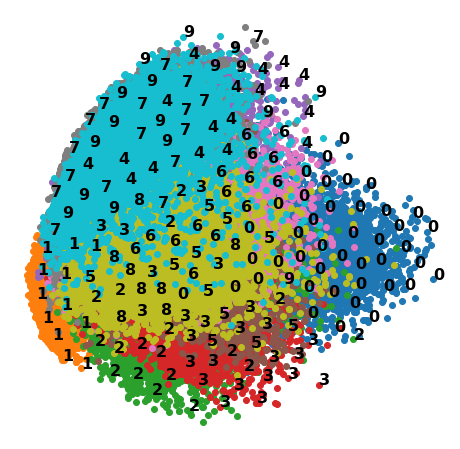

In [84]:
_, ax = plt.subplots(figsize=(8, 8))

plot_digits(ax, X_pca_reduced, y)

It's twice slower than LLE, but still much faster than MDS, and the result looks great. Let's see if a bit of PCA can speed it up:

In [85]:
pca_umap = Pipeline([("pca", PCA(n_components=0.95, random_state=42)),
                     ("umap", umap.UMAP(random_state=42))])

t0 = time.time()
X_pca_umap_reduced = pca_umap.fit_transform(X)
t1 = time.time()
print(f"PCA+UMAP took {t1 - t0:.1f}s.")

PCA+UMAP took 60.7s.


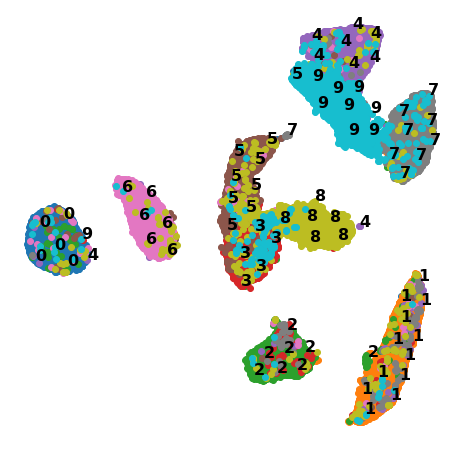

In [86]:
_, ax = plt.subplots(figsize=(8, 8))

plot_digits(ax, X_pca_umap_reduced, y)

Yes, PCA roughly gave us over 2x speedup, without damaging the result. We have a winner!